<a href="https://colab.research.google.com/github/A-Hoshor/MLA_ADH/blob/main/FinalProject_Classification_ADH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Final Project Classification #  
**Alyssa Hoshor**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as metrics

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/sonar.csv')

### Statistical and Visual Exploration

In [ ]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<Axes: xlabel='Label', ylabel='count'>

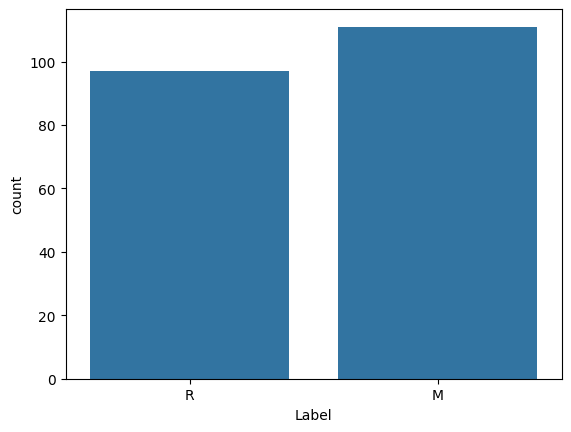

In [ ]:
sns.countplot(data=df, x='Label')

### Splitting Data into Train/Test

In [ ]:
df

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
df['Binary']=df['Label'].map({'R':0,'M':1})

In [ ]:
df

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Binary
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M,1


In [ ]:
df.drop(['Label'], axis=1, inplace=True)

In [ ]:
df

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Binary
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [ ]:
X = df.iloc[:,0:-1]

In [ ]:
y = df[['Binary']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

### Building the Pipeline

In [ ]:
print (X.columns)

Index(['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7',
       'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13',
       'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19',
       'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25',
       'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31',
       'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37',
       'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43',
       'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55',
       'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60'],
      dtype='object')


In [ ]:
num_attribs= ['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7','Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13','Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19','Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25','Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31','Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37','Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43','Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49','Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55','Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60']

In [ ]:
col_transform= ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs)
])

In [ ]:
pipeline = Pipeline([
    ('trans', col_transform),
    ('lr_model', LogisticRegression())
])

In [ ]:
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Freq_1', 'Freq_2', 'Freq_3',
                                                   'Freq_4', 'Freq_5', 'Freq_6',
                                                   'Freq_7', 'Freq_8', 'Freq_9',
                                                   'Freq_10', 'Freq_11',
                                                   'Freq_12', 'Freq_13',
                                                   'Freq_14', 'Freq_15',
                                                   'Freq_16', 'Freq_17',
                                                   'Freq_18', 'Freq_19',
                                                   'Freq_20', 'Freq_21',
                                                   'Freq_22', 'Freq_23',
                                                   'Freq_24', 'Freq_25',
                                                   'Freq_26', 'Freq_27',
                                                   'Freq_28', 'Freq_29',
                                                   'Freq_30', ...])])),
                ('lr_model', LogisticRegression())])

### Executing the Model

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Freq_1', 'Freq_2', 'Freq_3',
                                                   'Freq_4', 'Freq_5', 'Freq_6',
                                                   'Freq_7', 'Freq_8', 'Freq_9',
                                                   'Freq_10', 'Freq_11',
                                                   'Freq_12', 'Freq_13',
                                                   'Freq_14', 'Freq_15',
                                                   'Freq_16', 'Freq_17',
                                                   'Freq_18', 'Freq_19',
                                                   'Freq_20', 'Freq_21',
                                                   'Freq_22', 'Freq_23',
                                                   'Freq_24', 'Freq_25',
                                                   'Freq_26', 'Freq_27',
                                                   'Freq_28', 'Freq_29',
                                                   'Freq_30', ...])])),
                ('lr_model', LogisticRegression())])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [ ]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

0.37222871580181704
0.408248290463863


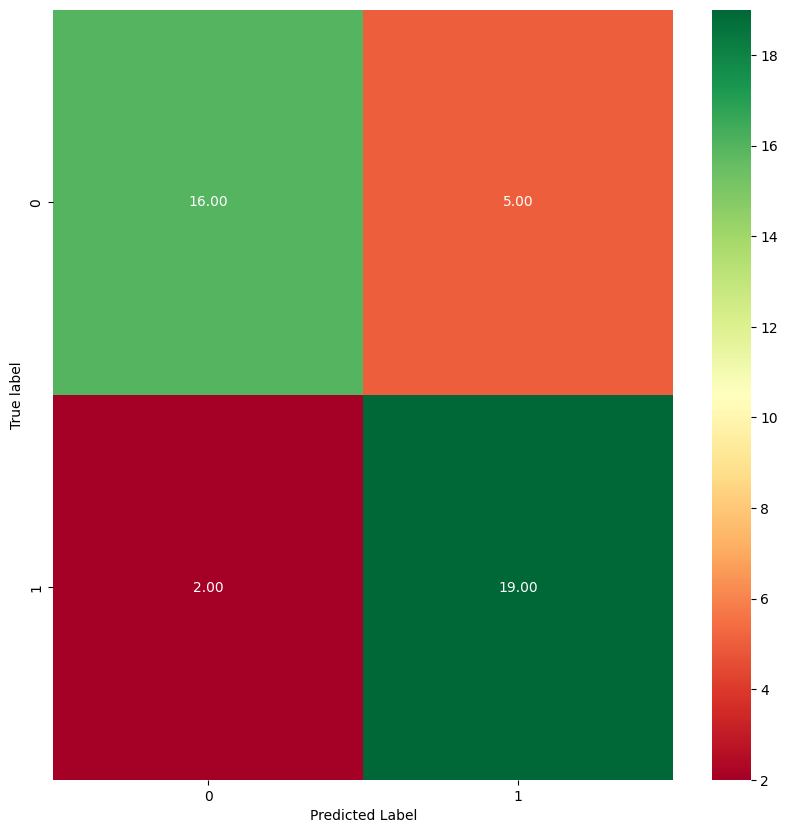

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
df.Binary.groupby(df.Binary).count()

Binary
0     97
1    111
Name: Binary, dtype: int64

In [ ]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 score: ", f1_score(y_test,y_pred))

Precision:  0.7916666666666666
Recall:  0.9047619047619048
F1 score:  0.8444444444444444


In [ ]:
probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

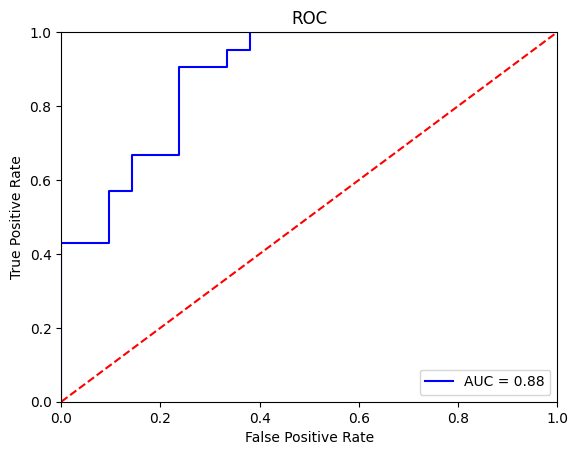

In [ ]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
Write a general conclusion about the results of your model.

#####Recall is better than precision, so we did not miss too many postivies, but we predicted 1's quite a few times when they were actually 0's. Harmonic mean is 0.84, which is pretty good.
#####I chose an ROC curve because our balance is pretty balanced(there is not a large disparity between our outcomes).
#####Our ROC curve is above and to the left of the dotted line, so our model is pretty good.

## Problem 2

### Reading the Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/sonar.csv')

### Splitting Data into Train/Test

In [ ]:
df['Binary']=df['Label'].map({'R':0,'M':1})

In [ ]:
df.drop(['Label'], axis=1, inplace=True)

In [ ]:
X = df.iloc[:,0:-1]

In [ ]:
y = df[['Binary']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

### Building the Pipeline

In [ ]:
num_attribs= ['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7','Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13','Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19','Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25','Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31','Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37','Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43','Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49','Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55','Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60']

In [ ]:
col_transform= ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs)
])

In [ ]:
pipeline=Pipeline([
    ('trans', col_transform),
    ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
])

### Executing the Model

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Freq_1', 'Freq_2', 'Freq_3',
                                                   'Freq_4', 'Freq_5', 'Freq_6',
                                                   'Freq_7', 'Freq_8', 'Freq_9',
                                                   'Freq_10', 'Freq_11',
                                                   'Freq_12', 'Freq_13',
                                                   'Freq_14', 'Freq_15',
                                                   'Freq_16', 'Freq_17',
                                                   'Freq_18', 'Freq_19',
                                                   'Freq_20', 'Freq_21',
                                                   'Freq_22', 'Freq_23',
                                                   'Freq_24', 'Freq_25',
                                                   'Freq_26', 'Freq_27',
                                                   'Freq_28', 'Freq_29',
                                                   'Freq_30', ...])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

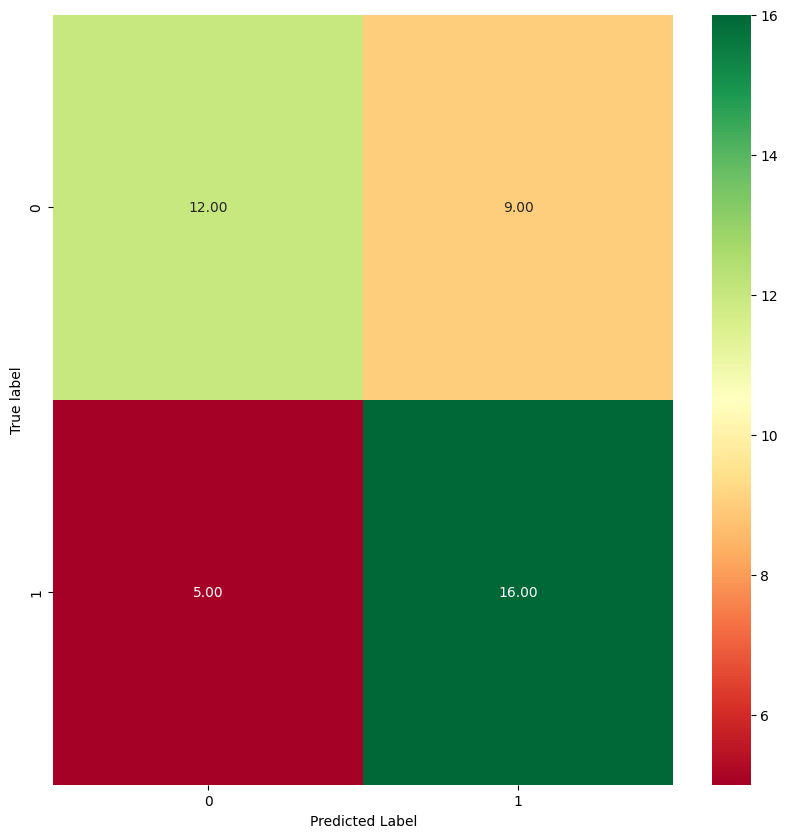

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))


Precision:  0.64
Recall: 0.7619047619047619
F1 Score: 0.6956521739130435


[Text(0.4732142857142857, 0.9166666666666666, 'x[10] <= 0.24\nsamples = 166\nvalue = [76, 90]'),
 Text(0.23214285714285715, 0.75, 'x[0] <= 0.278\nsamples = 72\nvalue = [55, 17]'),
 Text(0.19642857142857142, 0.5833333333333334, 'x[16] <= 0.347\nsamples = 66\nvalue = [55, 11]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[27] <= 0.957\nsamples = 44\nvalue = [42, 2]'),
 Text(0.03571428571428571, 0.25, 'samples = 41\nvalue = [41, 0]'),
 Text(0.10714285714285714, 0.25, 'x[57] <= 0.102\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07142857142857142, 0.08333333333333333, 'samples = 2\nvalue = [0, 2]'),
 Text(0.14285714285714285, 0.08333333333333333, 'samples = 1\nvalue = [1, 0]'),
 Text(0.32142857142857145, 0.4166666666666667, 'x[58] <= 0.204\nsamples = 22\nvalue = [13, 9]'),
 Text(0.25, 0.25, 'x[26] <= 0.349\nsamples = 13\nvalue = [11, 2]'),
 Text(0.21428571428571427, 0.08333333333333333, 'samples = 2\nvalue = [0, 2]'),
 Text(0.2857142857142857, 0.08333333333333333, 'samples = 11\nvalue = [1

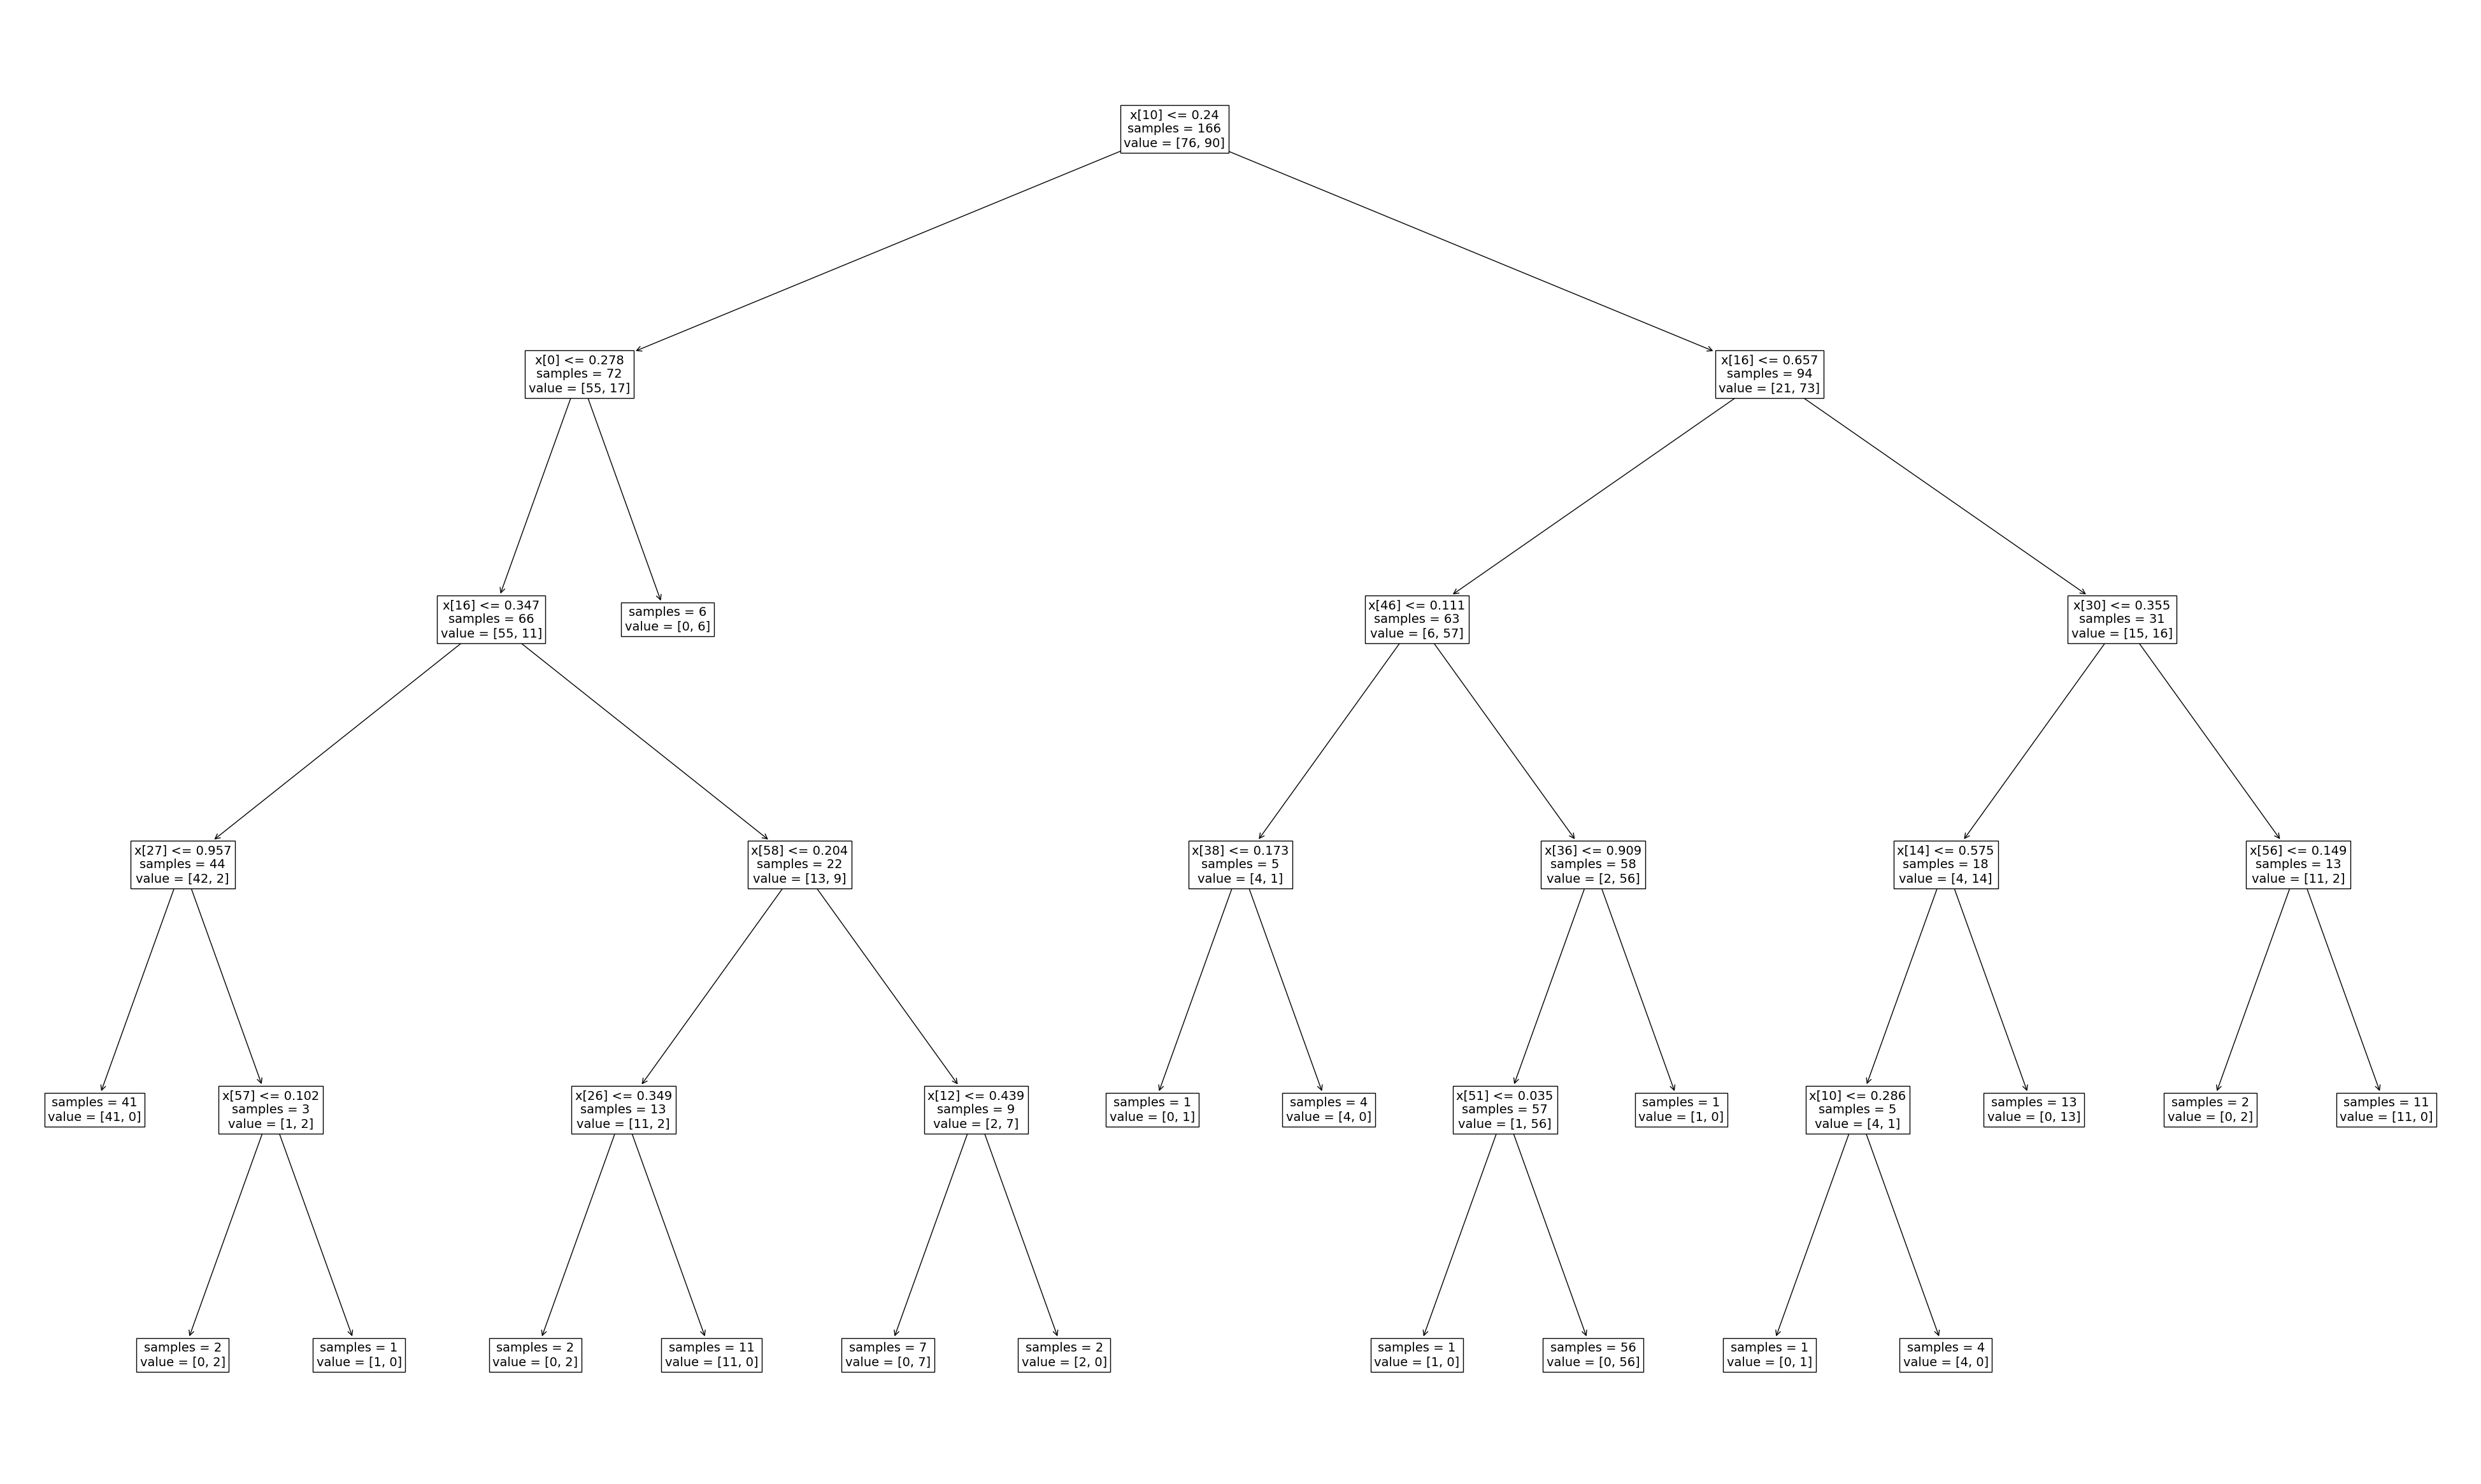

In [ ]:
fig = plt.figure(figsize=(50,30))
tree.plot_tree(pipeline.named_steps.decision_tree, fontsize=14,impurity=False)

In [ ]:
param_grid = {'decision_tree__criterion':['gini','entropy'],'decision_tree__max_depth':[5,10,15,20]}  #<-- big tip, you have to use two underscores for each parameter. Don't forget!


In [ ]:
grid_pipeline = GridSearchCV(pipeline, param_grid)

In [ ]:
grid_pipeline.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Freq_1',
                                                                          'Freq_2',
                                                                          'Freq_3',
                                                                          'Freq_4',
                                                                          'Freq_5',
                                                                          'Freq_6',
                                                                          'Freq_7',
                                                                          'Freq_8',
                                                                          'Freq_9',
                                                                          'Freq_10',
                                                                          'Freq_11',
                                                                          'Freq_12',
                                                                          'Freq_13',
                                                                          'Freq_14',
                                                                          'Freq_15',
                                                                          'Freq_16',
                                                                          'Freq_17',
                                                                          'Freq_18',
                                                                          'Freq_19',
                                                                          'Freq_20',
                                                                          'Freq_21',
                                                                          'Freq_22',
                                                                          'Freq_23',
                                                                          'Freq_24',
                                                                          'Freq_25',
                                                                          'Freq_26',
                                                                          'Freq_27',
                                                                          'Freq_28',
                                                                          'Freq_29',
                                                                          'Freq_30', ...])])),
                                       ('decision_tree',
                                        DecisionTreeClassifier(max_depth=5))]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [5, 10, 15, 20]})

In [ ]:
grid_pipeline.best_params_

{'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 5}

In [ ]:
dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [ ]:
y_pred = dt.predict(X_test)

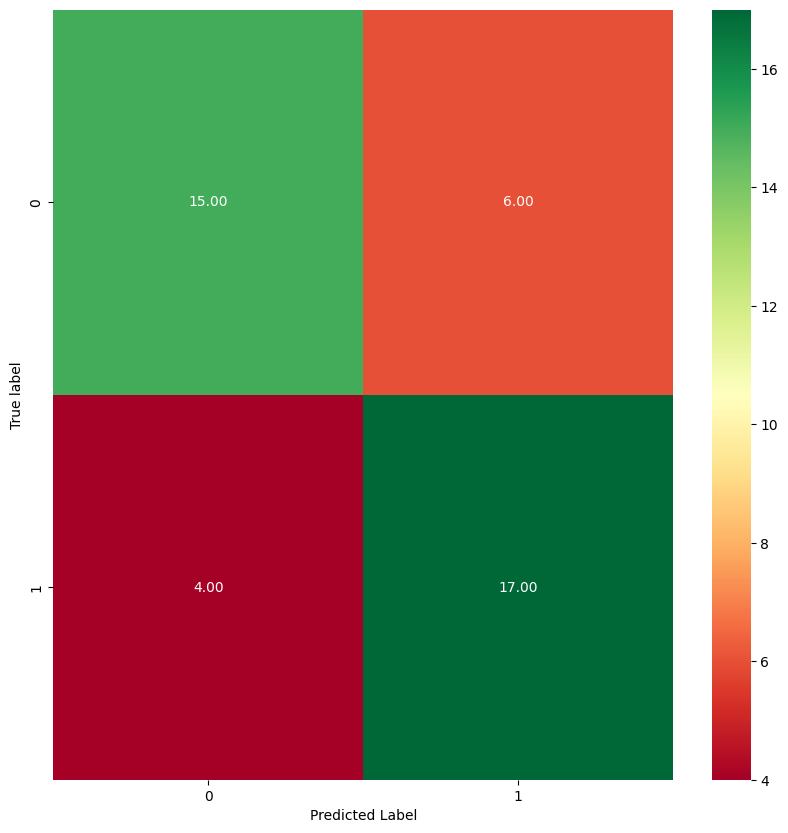

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision:  0.7391304347826086
Recall: 0.8095238095238095
F1 Score: 0.7727272727272727


### Conclusion
Write a general conclusion about the results of your model.

#####Our first iteration with the decision tree did not yield the best results.We had a precision score of 0.6, a recall score of 0.8, and a F1 score of 0.7.
####With the addition of the GridSearch, we yielded much better results with a precision score of 0.74, a recall score of 0.8, and an overall F1 score of 0.77.